**Import the Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)             # To get diffent different colors
pd.set_option('display.max_columns', None)  # To display the max columns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

**Read the processed Data**

In [2]:
data=pd.read_csv("Preprocessed_data.csv")
data

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,34.827662,-118.999073,2,9,0,42.39,0,0,16,0,1,0,1,1,0,0,1,1,1,1,65.60,593.30,0.00,0,381.51,974.81,1
1,1,46,0,0,34.162515,-118.203869,0,9,0,10.69,1,0,10,0,0,0,0,0,1,1,0,0,0,1,-4.00,542.40,38.33,10,96.21,610.28,1
2,1,50,0,0,33.645672,-117.922613,0,4,5,33.65,0,2,30,0,0,1,0,0,0,0,1,0,1,0,73.90,280.85,0.00,0,134.60,415.45,0
3,1,78,1,0,38.014457,-122.115432,1,13,4,27.82,0,2,4,0,1,1,0,1,1,0,1,0,1,0,98.00,1237.85,0.00,0,361.66,1599.51,0
4,0,75,1,0,34.227846,-119.079903,3,3,0,7.38,0,2,11,0,0,0,1,1,0,0,1,0,1,1,83.90,267.40,0.00,0,22.14,289.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,0,53,0,0,36.807595,-118.901544,0,1,5,42.09,0,2,9,0,0,0,0,0,0,0,1,0,1,1,70.15,70.15,0.00,0,42.09,112.24,0
4831,0,20,0,0,32.759327,-116.997260,0,13,4,46.68,0,1,59,1,0,0,1,0,0,1,1,1,0,1,55.15,742.90,0.00,0,606.84,1349.74,1
4832,1,40,1,0,37.734971,-120.954271,1,22,4,16.20,1,2,17,0,0,0,0,0,1,1,1,0,1,0,85.10,1873.70,0.00,0,356.40,2230.10,0
4833,1,22,0,0,39.108252,-123.645121,0,2,5,18.62,0,1,51,0,1,0,0,0,0,0,1,0,1,1,50.30,92.75,0.00,0,37.24,129.99,1


$Step-1$
  - Divide data into input and target 

In [3]:
X = data.drop("Customer Status",axis = 1)
y = data[["Customer Status"]]

In [4]:
X.shape,y.shape

((4835, 30), (4835, 1))

$Step-2$
 - Train test split

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 random_state=42,
                                                 test_size=0.2)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3868, 30)
(967, 30)
(3868, 1)
(967, 1)


**Removing the outliers using Z-Score**

In [7]:
from scipy import stats  #All statistics related

#Define the columns for which youn want to remove the outliers
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [8]:
X_train.head()

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
432,1,31,0,0,33.977468,-118.445475,0,56,0,37.99,1,2,24,1,0,0,1,1,1,1,1,0,1,1,105.35,5794.45,0.0,0,2127.44,7921.89
4135,1,21,1,0,33.723579,-118.005441,4,66,0,7.67,1,1,69,0,0,0,1,0,1,1,1,0,0,0,63.85,4264.60,0.0,0,506.22,4770.82
289,1,41,0,1,34.007353,-118.033683,0,12,4,27.07,0,0,29,1,0,0,0,1,1,1,1,0,1,2,69.85,837.50,0.0,0,324.84,1162.34
2692,0,42,1,0,37.441931,-121.878502,1,69,0,37.20,1,2,27,0,1,1,0,1,1,1,1,0,1,0,103.95,7446.90,0.0,0,2566.80,10013.70
4110,0,32,1,0,33.324900,-114.758334,0,57,2,12.19,1,2,16,1,0,0,0,1,1,1,1,0,1,0,-3.00,5497.05,0.0,0,694.83,6191.88


**Without Hyperparameter Tuning**

$Decision Tree$

In [9]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()   #hyper parameter tuning means we are nor providing any parameters 
                                     #we will be using the default parameters 
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

**Step-5 :**
   $Predictions$

In [10]:
y_pred_dt = dtree.predict(X_test)

print(y_pred_dt[:10])
print(y_test.values[:10])

[1 0 1 0 1 0 1 1 0 1]
[[0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]


**Step-6**

$Metrics$

In [11]:
acc_dt = round(accuracy_score(y_test,y_pred_dt),2)
acc_dt

0.75

In [12]:
cmt=(confusion_matrix(y_test,y_pred_dt),2)
cmt

(array([[212, 116],
        [122, 517]], dtype=int64),
 2)

In [13]:
#bys using the formulas

tn,fp,fn,tp = confusion_matrix(y_test,y_pred_dt).ravel()

print(tn,fp,fn,tp)

accuracy = (tn+tp)/(tn+tp+fn+fp)

precision = tp/(tp+fp)

recall = tp/(tp+fn)

f1 = (2*precision*recall)/(precision+recall)

print(f'The accuracy is : {accuracy}')
print(f'The precision  is : {precision}')
print(f'The recall is : {recall}')
print(f'The f1 is : {f1}')


212 116 122 517
The accuracy is : 0.7538779731127198
The precision  is : 0.8167456556082149
The recall is : 0.809076682316119
The f1 is : 0.8128930817610063


In [59]:
acc_dt = round(accuracy_score(y_test,y_pred_dt)*100,2)
pre_dt = round(precision_score(y_test,y_pred_dt),2)
rec_dt = round(recall_score(y_test,y_pred_dt),2)
f1_dt = round(f1_score(y_test,y_pred_dt),2)

In [14]:
#using package methods

print(accuracy_score(y_test,y_pred_dt))
print(precision_score(y_test,y_pred_dt))
print(recall_score(y_test,y_pred_dt))
print(f1_score(y_test,y_pred_dt))

0.7538779731127198
0.8167456556082149
0.809076682316119
0.8128930817610063


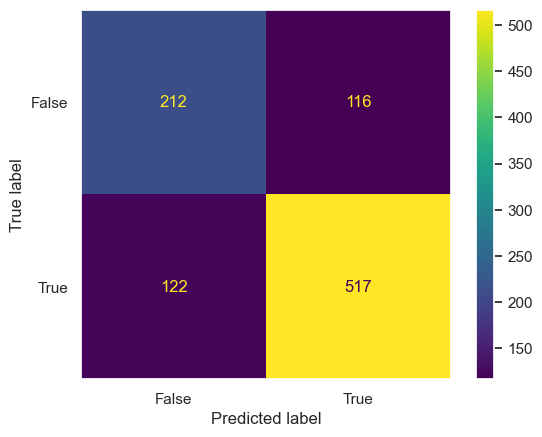

In [15]:
cmt=(confusion_matrix(y_test,y_pred_dt))
ConfusionMatrixDisplay(cmt,display_labels=[False,True]).plot()
plt.grid(False)

In [16]:
dtree.predict_proba(X_test)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [17]:
#class 0 and class 1'
#we need to extract only class 1 probabailities


y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]   # Class-1 probabilities   #all the true positives
y_dt_pred_prob

roc_curve(y_test,y_dt_pred_prob)
#y_score ==== probability

(array([0.        , 0.35365854, 1.        ]),
 array([0.        , 0.80907668, 1.        ]),
 array([2., 1., 0.]))

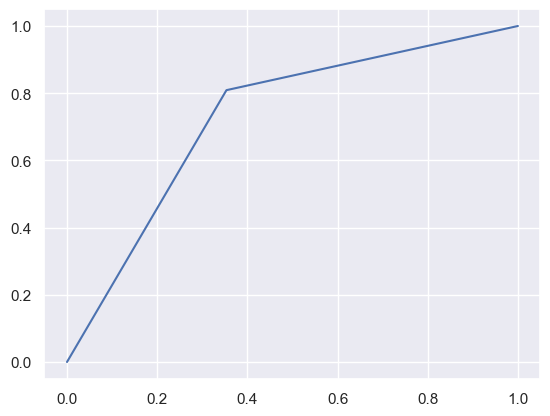

In [18]:
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)

$Logistic-Regression$

In [19]:
#import and apply fit

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)

C:\Users\sures\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sures\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
#----------predictions

y_pred_LR = LR.predict(X_test)

print(y_test.values[:5])
print(y_pred_LR[:5])

[[0]
 [1]
 [1]
 [0]
 [0]]
[1 1 1 0 1]


In [36]:
#------------metrics

acc_LR = round(accuracy_score(y_test,y_pred_LR)*100,2)
pre_LR = round(precision_score(y_test,y_pred_LR),2)
rec_LR = round(recall_score(y_test,y_pred_LR),2)
f1_LR = round(f1_score(y_test,y_pred_LR),2)

print("Accuracy is : ",acc_LR)
print("Precision is : ",pre_LR)
print("Recall is : ",rec_LR)
print("F1 score is : ",f1_LR)

Accuracy is :  76.53
Precision is :  0.81
Recall is :  0.84
F1 score is :  0.83


In [22]:
print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

           0       0.67      0.62      0.64       328
           1       0.81      0.84      0.83       639

    accuracy                           0.77       967
   macro avg       0.74      0.73      0.73       967
weighted avg       0.76      0.77      0.76       967



In [23]:
#------------ confusion matrix

cmt = confusion_matrix(y_test,y_pred_LR)
cmt

array([[203, 125],
       [102, 537]], dtype=int64)

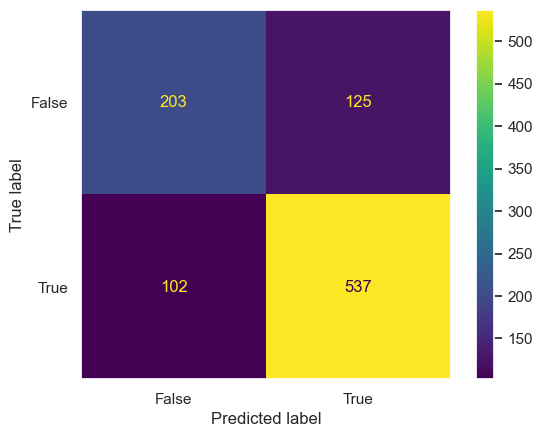

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

In [25]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_LR).ravel()
print(tn, fp, fn, tp)

print("True Negative : ",tn)
print("False Positive : ",fp)
print("False Negative: ",fn)
print("True Positive: ",tp)

203 125 102 537
True Negative :  203
False Positive :  125
False Negative:  102
True Positive:  537


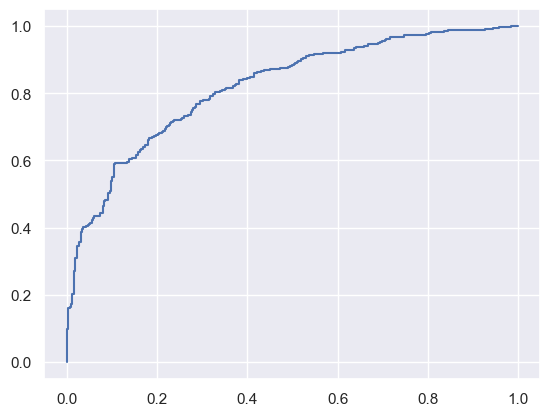

In [26]:
#-----ROC_AUC Curve

y_pred_LR_prob = LR.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_LR_prob)
plt.plot(fpr,tpr)

$KNN$

In [27]:
pip uninstall sklearn


Note: you may need to restart the kernel to use updated packages.


In [28]:

pip install scikit-learn==1.2.2

Note: you may need to restart the kernel to use updated packages.


In [29]:
from sklearn.neighbors import KNeighborsClassifier
KNNtree = KNeighborsClassifier()
KNNtree.fit(X_train,y_train)

C:\Users\sures\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [32]:
y_pred_KNN = KNNtree.predict(X_test)

In [33]:
print(y_test.values[:5])
print(y_pred_KNN[:5])

[[0]
 [1]
 [1]
 [0]
 [0]]
[1 1 1 0 1]


In [34]:
#------------- metrics

print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

           0       0.63      0.51      0.57       328
           1       0.77      0.85      0.81       639

    accuracy                           0.73       967
   macro avg       0.70      0.68      0.69       967
weighted avg       0.73      0.73      0.73       967



In [35]:
acc_KNN= round(accuracy_score(y_test,y_pred_KNN)*100,2)
f1_KNN=round(f1_score(y_test,y_pred_KNN),2)
precision_KNN=round(precision_score(y_test,y_pred_KNN),2)
recall_KNN=round(recall_score(y_test,y_pred_KNN),2)
print("accuray is:",acc_KNN)
print("F1 is:",f1_KNN)
print("Precision is:",precision_KNN)
print("Recall is:",recall_KNN)

accuray is: 73.42
F1 is: 0.81
Precision is: 0.77
Recall is: 0.85


In [37]:
#-------------confusion matrix

cmt = confusion_matrix(y_test,y_pred_KNN)
cmt

array([[168, 160],
       [ 97, 542]], dtype=int64)

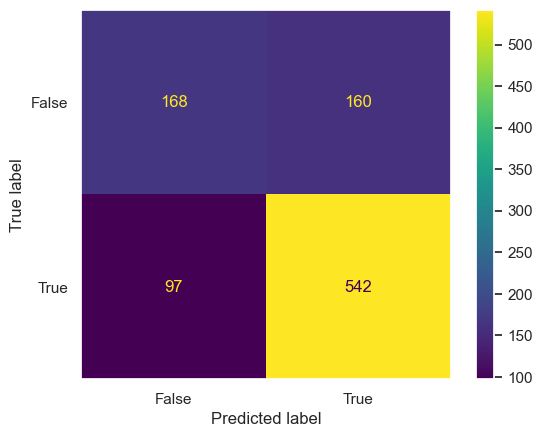

In [38]:
disp = ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

In [39]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_KNN).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 168
False postive: 160
False negative: 97
True postive: 542


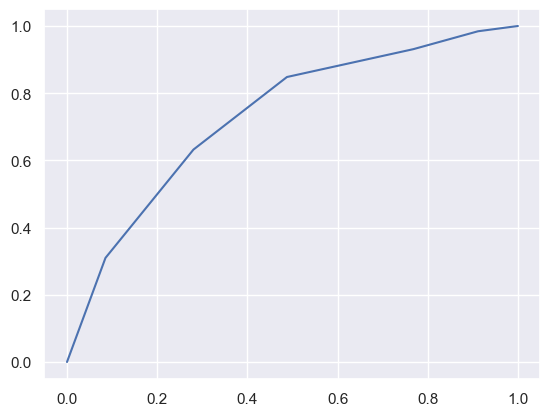

In [40]:
#------------ROC-AUC Curve

y_pred_KNN_prob = KNNtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_KNN_prob)
plt.plot(fpr,tpr)
plt.show()

$Naive-Bayes$

In [41]:
from sklearn.naive_bayes import GaussianNB
NBtree = GaussianNB()
NBtree.fit(X_train,y_train)

C:\Users\sures\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [42]:
#------prediction

y_pred_NB = NBtree.predict(X_test)

print(y_test.values[:5])
print(y_pred_NB[:5])

[[0]
 [1]
 [1]
 [0]
 [0]]
[1 0 1 0 0]


In [43]:
#--------------metrics

acc_NB= round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)
print("accuray is:",acc_NB)
print("F1 is:",f1_NB)
print("Precision is:",precision_NB)
print("Recall is:",recall_NB)

accuray is: 73.53
F1 is: 0.78
Precision is: 0.86
Recall is: 0.72


In [44]:
#--------------Confusion matrix

cmt = confusion_matrix(y_test,y_pred_NB)
cmt

array([[250,  78],
       [178, 461]], dtype=int64)

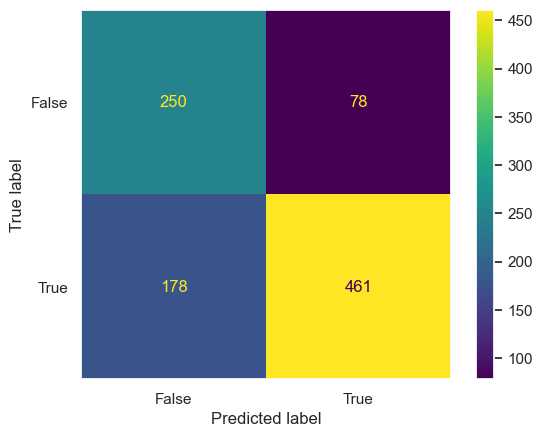

In [45]:
disp = ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

In [46]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_NB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)


True negative: 250
False postive: 78
False negative: 178
True postive: 461


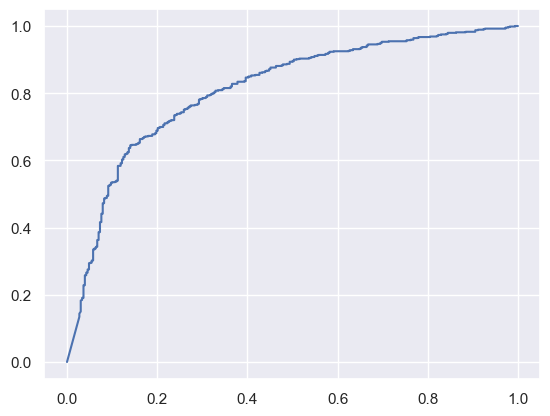

In [47]:
#------------ROC-AUC Curve

y_pred_NB_prob = NBtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_NB_prob)
plt.plot(fpr,tpr)
plt.show()

$Random-Forest$

In [48]:
from sklearn.ensemble import RandomForestClassifier
RFtree = RandomForestClassifier()
RFtree.fit(X_train,y_train)

C:\Users\sures\AppData\Local\Temp\ipykernel_17068\1653722672.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFtree.fit(X_train,y_train)


RandomForestClassifier()

In [49]:
#--------------prediction

y_pred_RF = RFtree.predict(X_test)

print(y_test.values[:5])
print(y_pred_RF[:5])

[[0]
 [1]
 [1]
 [0]
 [0]]
[1 0 1 0 1]


In [50]:
#----------------metrics

acc_RF= round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

accuray is: 80.87
F1 is: 0.86
Precision is: 0.83
Recall is: 0.89


In [51]:
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70       328
           1       0.83      0.89      0.86       639

    accuracy                           0.81       967
   macro avg       0.79      0.77      0.78       967
weighted avg       0.81      0.81      0.80       967



In [52]:
#--------------confusion matrix

cmt = confusion_matrix(y_test,y_pred_RF)
cmt

array([[213, 115],
       [ 70, 569]], dtype=int64)

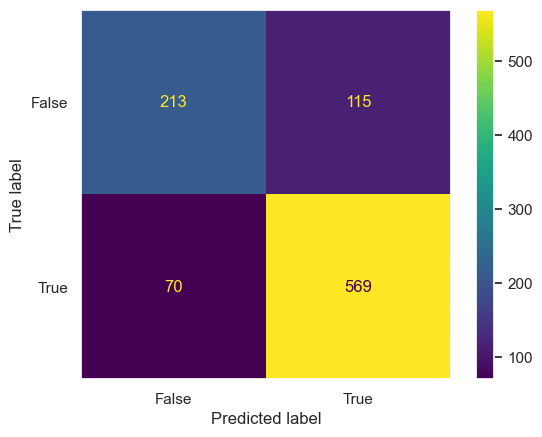

In [53]:
disp = ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

In [54]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)


True negative: 213
False postive: 115
False negative: 70
True postive: 569


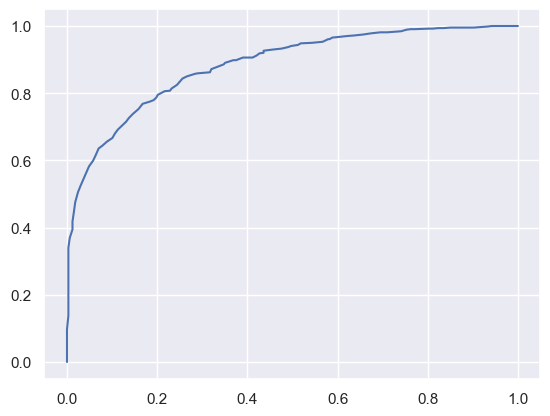

In [55]:
#--------------ROC-AUC Curve

y_pred_RF_prob = RFtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_RF_prob)
plt.plot(fpr,tpr)
plt.show()

In [61]:
dict1 = {'Accuracy':[acc_dt,acc_KNN,acc_LR,acc_NB,acc_RF],
      "Precision":[pre_dt,precision_KNN,pre_LR,precision_NB,precision_RF],
      "Recall":[rec_dt,recall_KNN,rec_LR,recall_NB,recall_RF],
      "F1-score":[f1_dt,f1_KNN,f1_LR,f1_NB,f1_RF]}

pd.DataFrame(dict1, index = ["Decision Tree","KNN","Logistic","Naive Bayes","Random Forest"])

,Accuracy,Precision,Recall,F1-score
Decision Tree,75.39,0.82,0.81,0.81
KNN,73.42,0.77,0.85,0.81
Logistic,76.53,0.81,0.84,0.83
Naive Bayes,73.53,0.86,0.72,0.78
Random Forest,80.87,0.83,0.89,0.86
